In [1]:
## Poisson Equation
# Load  FEM Packages
from fenics import *
from mshr import *
# Plotting Libraries
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")

In [2]:
mesh = Mesh('dolfin_fine.xml.gz')
sub_domains = MeshFunction("size_t", mesh, "dolfin_fine_subdomains.xml.gz")

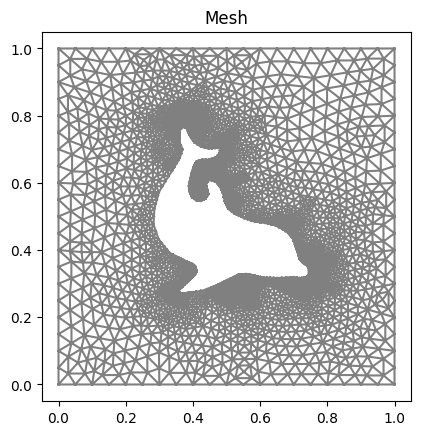

In [3]:
plot(mesh, title='Mesh')

In [4]:
# define subdomain markers and facets
# markers = MeshFunction('size_t',mesh, mesh.topology().dim(), mesh.domains())
# boundaries = MeshFunction('size_t',mesh, mesh.topology().dim()-1, mesh.domains())

# define function space
V = FunctionSpace(mesh, 'Lagrange', 1) # a first order lagrangian function

In [5]:
# 
bc0 = DirichletBC(V, Constant(1.0), sub_domains, 0)
# x0 = 0
bc2 = DirichletBC(V, Constant(0.0), sub_domains, 2)
# x0 = 1
bc1 = DirichletBC(V, Constant(0.0), sub_domains, 1)


In [6]:
bc = [bc0, bc1, bc2]

In [7]:
u = TrialFunction(V)
v = TestFunction(V)
a = dot(grad(u), grad(v)) * dx
L = Constant('0') * v * dx
u = Function(V)
solve(a == L, u, bc)

Solving linear variational problem.


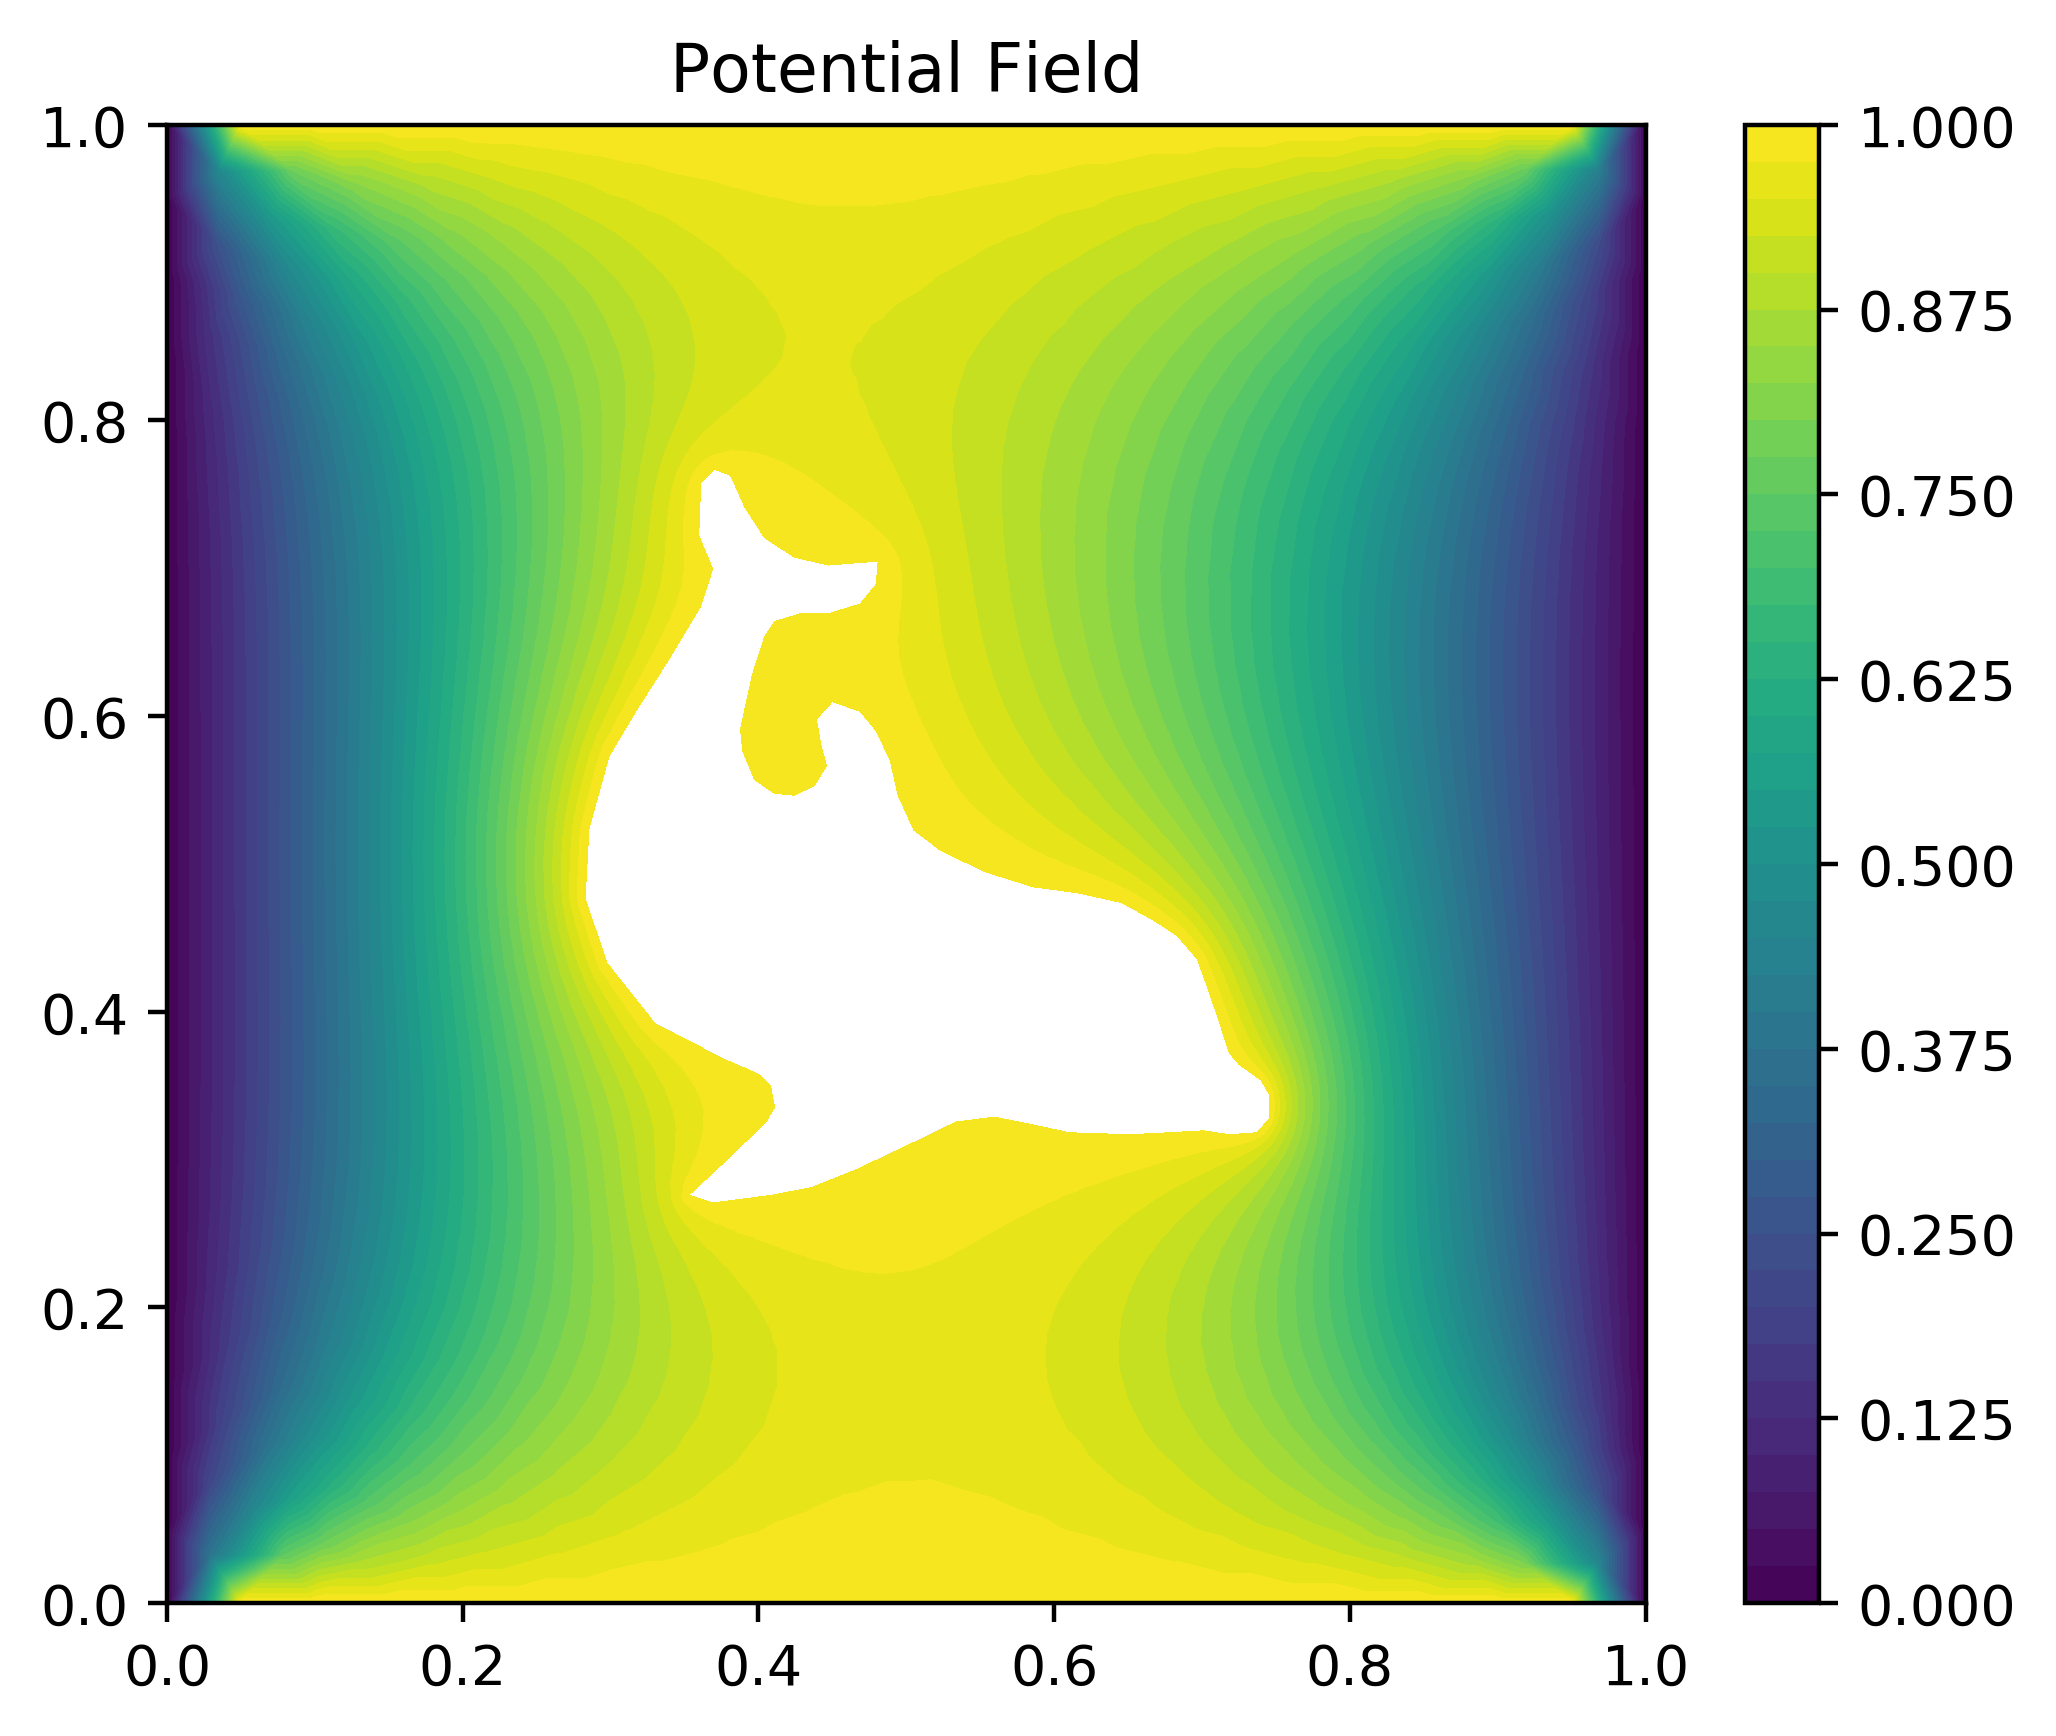

In [8]:
## Plotting the solution.
plt.figure(dpi=400)                       # Set the resolution
plot(u, title = 'Potential Field')              # Set the title
plt.colorbar(plot(u)) # Add a colorbar
plt.show()

Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


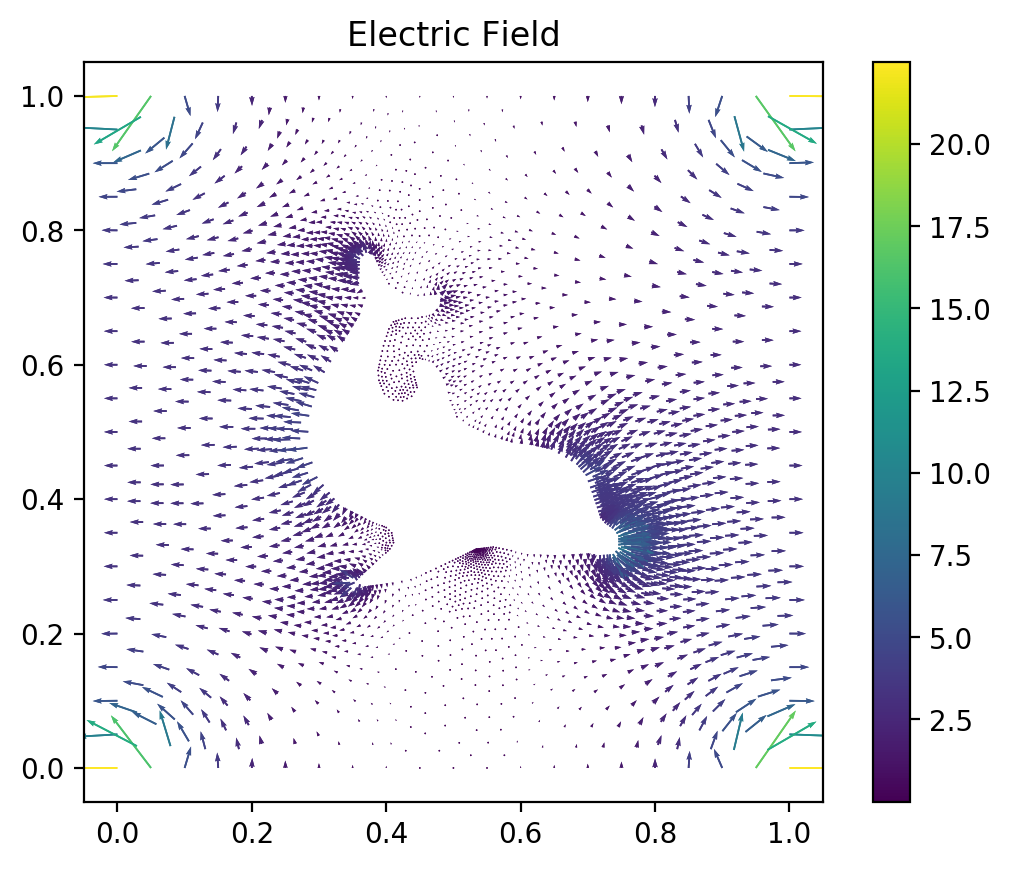

In [9]:
## Plotting the electric field.
e_field = - grad(u)
plt.figure(dpi=200)                       # Set the resolution
plot(e_field, title = 'Electric Field')              # Set the title
plt.colorbar(plot(e_field)) # Add a colorbar
plt.show()                  # Set the title